# 2-4-1. 데이터 불러오기

In [1]:
import pandas as pd       # pandas library 불러내기.
import numpy as np        # numpy library 불러내기.
pd.set_option('display.max_columns', None)   # 결과물로 보여주는 열 갯수 최대화.
pd.set_option('display.max_rows', None)      # 결과물로 보여주는 행 갯수 최대화.
df = pd.read_csv('healthcare-dataset-stroke-data.csv') # 원본 데이터파일 불러와서 데이터프레임(df)에 저장.
df.head()                                    # 데이터프레임(df)를 5행까기 보여주기.

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
# 데이터프레임 df의 행과 열 개수 확인

df.shape

(5110, 12)

# 2-4-2. ID 변수 설정

In [4]:
# ID 변수인 id 값의 결측값 확인.

df['id'].isnull().sum()   

0

In [3]:
# 코딩 부분 체크.

df['id'].isnull()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [7]:
# ID 변수인 id 값의 중복 여부를 체크하기 위해 유일한(unique) 값의 개수 체크. 

n = len(pd.unique(df['id']))   # pd.unique는 유일한 변수값을 출력하고 len은 값의 개수를 카운트.  
print(n)

5110


In [6]:
# 코딩 부분 체크.

pd.unique(df['id']).sum()

186606108

In [10]:
# 숫자형태가 아닌 ID 변수의 갯수를 세는 파이썬 코드.

mask = pd.to_numeric(df['id'], errors='coerce').isna()
a = mask.sum() 
print (a)  

0


In [ ]:
# pd.to_numeric에 대한 설명 및 errors='coerce'에 대한 이해.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html

In [13]:
# ID 변수의 데이터 타입 확인.

df['id'].dtypes

dtype('int64')

In [5]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

# 2-4-3. 타겟변수 생성

In [14]:
# 타겟 변수(stroke)의 데이터 타입 확인.

df['stroke'].dtype

dtype('int64')

In [9]:
# 타겟 변수의 결측값 갯수 확인.

df['stroke'].isnull().sum()

0

In [15]:
# 타겟 변수의 값 분포 확인 (개수 기준).

df['stroke'].value_counts(dropna=False) # 0값과 1값이 불균형 분포.

0    4861
1     249
Name: stroke, dtype: int64

In [16]:
# 타겟 변수의 값 분포 확인 (비율 기준).

df['stroke'].value_counts(dropna=False, normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

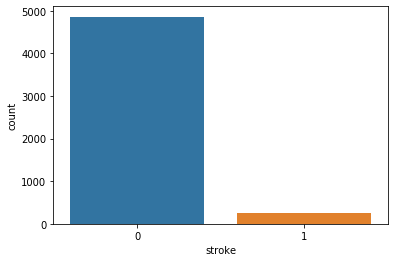

In [18]:
import matplotlib.pyplot as plt   # matplotlib 라이브러리 호출.
%matplotlib inline                
import seaborn as sns             # seaborn 라이브러리 호출. 

x = df['stroke']
sns.countplot(x)

# 2-4-4. 기타 변수 데이터 처리

In [19]:
# 구간 변수(interval variable)의 데이터 타입 확인.

cols = ['age','avg_glucose_level','bmi'] # 구간 변수를 cols에 저장.
df[cols].dtypes

age                  float64
avg_glucose_level    float64
bmi                  float64
dtype: object

In [20]:
# 구간 변수 요약 통계.

pd.options.display.float_format = '{:.2f}'.format # 소숫점 2자리로 숫자 표기 제한.
df[cols].describe()

,age,avg_glucose_level,bmi
count,5110.00,5110.00,4909.00
mean,43.23,106.15,28.89
std,22.61,45.28,7.85
min,0.08,55.12,10.30
25%,25.00,77.24,23.50
50%,45.00,91.88,28.10
75%,61.00,114.09,33.10
max,82.00,271.74,97.60


In [22]:
# 나이(age) 18세 초과 찾기.

df['age'] > 18   

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
30       True
31       True
32       True
33       True
34       True
35       True
36       True
37       True
38       True
39       True
40       True
41       True
42       True
43       True
44       True
45       True
46       True
47       True
48       True
49       True
50       True
51       True
52       True
53       True
54       True
55       True
56       True
57       True
58       True
59       True
60       True
61       True
62       True
63       True
64       True
65       True
66       True
67       True
68       True
69       True
70       True
71    

In [21]:
# 나이 18세 초과되는 대상자만 별도로 모으기.

c = df['age'] > 18   # c는 기준(criterion)의 약자.
df[c].head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,nan,never smoked,1
2,31112,Male,80.00,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1


In [22]:
len(df[c])   # df[c]의 자료 개수(행 기준)

4194

In [23]:
# 원래 데이터프레임 df의 행과 열 개수
df.shape

(5110, 12)

In [24]:
# 원래 데이터프레임 df의 행 개수.
len(df)

5110

In [25]:
len(df[c]) / len(df)   # df에 대비해서 df[c]의 자료 개수(행 기준) 비율.

0.8207436399217222

In [26]:
df1 = df[c]   # 데이터프레임 df[c]를 df1에 저장.
df1.shape

(4194, 12)

In [27]:
# 데이터프레임 df1의 변수명(컬럼명) 확인.
list(df1.columns)

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [29]:
# Residence_type 변수명을 소문자로 시작하게 변경.
df1.rename(columns={'Residence_type' : 'residence_type'}, inplace=True) 

In [30]:
# 범주형 변수의 결측값 개수 확인.
# 범주형 변수를 cols1에 저장.
cols1 = ['gender', 'hypertension', 'heart_disease', 'ever_married',\
        'work_type', 'residence_type', 'smoking_status']
df1[cols1].isnull().sum() 

gender            0
hypertension      0
heart_disease     0
ever_married      0
work_type         0
residence_type    0
smoking_status    0
dtype: int64

In [31]:
# 범주형 변수 데이터 타입 확인.
df1[cols1].dtypes

gender            object
hypertension       int64
heart_disease      int64
ever_married      object
work_type         object
residence_type    object
smoking_status    object
dtype: object

# 2-5-2. 요약통계 및 도수분포표 점검

In [32]:
# 구간 변수 요약통계 revisited.
cols = ['age','avg_glucose_level','bmi'] # 구간 변수를 cols에 저장. 
df1[cols].describe()                     # 구간(interval) 변수의 요약통계 구하기.

,age,avg_glucose_level,bmi
count,4194.00,4194.00,4014.00
mean,50.66,108.63,30.49
std,17.53,48.00,7.22
min,19.00,55.12,11.30
25%,37.00,77.42,25.50
50%,51.00,92.36,29.30
75%,64.00,116.22,34.20
max,82.00,271.74,92.00


In [33]:
# 구간 변수 왜도.
df1[cols].skew()

age                 0.03
avg_glucose_level   1.45
bmi                 1.24
dtype: float64

In [34]:
# 구간 변수 첨도.
df1[cols].kurtosis()

age                 -1.02
avg_glucose_level    1.09
bmi                  3.45
dtype: float64

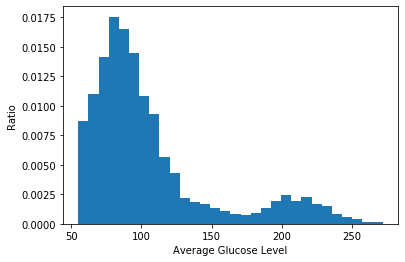

In [39]:
# 혈당량(avg_glucose_level) 분포 그래프로 확인.
x = df["avg_glucose_level"]
plt.hist(x, density=True, bins=30)  # density=True 자료의 비율을 디스플레이함.
plt.ylabel('Ratio')
plt.xlabel('Average Glucose Level');

In [40]:
# 근무 형태(work_type) 값 개수 확인.
df1['work_type'].value_counts(dropna=False)

Private          2740
Self-employed     804
Govt_job          648
Never_worked        2
Name: work_type, dtype: int64

In [41]:
# 근무 형태(work_type) 값 개수를 표로 만들기.
pd.crosstab(df1['work_type'], columns='count')   # frequency table 생성(개수 기준).

col_0,count
work_type,
Govt_job,648
Never_worked,2
Private,2740
Self-employed,804


In [42]:
# 근무 형태(work_type) 값 개수 비율을 표로 만들기.
pd.crosstab(df1['work_type'], columns='ratio', normalize=True)   # frequency table 생성(비율 기준).

col_0,ratio
work_type,
Govt_job,0.15
Never_worked,0.00
Private,0.65
Self-employed,0.19


In [43]:
# 근무 형태(work_type) 값 개수를 타겟변수(stroke) 기준으로 분류.
pd.crosstab(df1['work_type'], df1['stroke'])   # frequency table 생성(개수 기준).

stroke,0,1
work_type,,
Govt_job,615,33
Never_worked,2,0
Private,2591,149
Self-employed,739,65


In [44]:
# 근무 형태(work_type) 값 개수 비율을 타겟변수(stroke) 기준으로 분류.
pd.crosstab(df1['work_type'], df1['stroke'], normalize=True)   # frequency table 생성(비율 기준).

stroke,0,1
work_type,,
Govt_job,0.15,0.01
Never_worked,0.00,0.00
Private,0.62,0.04
Self-employed,0.18,0.02


# 2-5-4. 상관관계 검토

In [45]:
# 구간 변수간 상관계수 확인.
cols = ['age','avg_glucose_level','bmi']  # 구간 변수를 cols에 저장.
df1[cols].corr()                          # 구간 변수간 상관계수 디스플레이.

,age,avg_glucose_level,bmi
age,1.00,0.23,0.02
avg_glucose_level,0.23,1.00,0.16
bmi,0.02,0.16,1.00


In [46]:
# 지금까지 처리한 데이터프레임 df1을 csv파일로 저장.
df1.to_csv('healthcare-dataset-2.csv', index=False) 